# Regression Problem

To begin, let's streamline some of our data loading and varaible estimation using the `pandas_profiling` library.  You can find the documentation [here](https://github.com/pandas-profiling/pandas-profiling).  We use this in anticipation of building a Linear Regression model on the Sacremento Housing dataset.

In [6]:
#%%bash
#pip install pandas_profiling

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import pandas as pd
import pandas_profiling

In [8]:
df = pd.read_csv('data/regression_data/sacremento_housing.csv', index_col=0)

In [10]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,985
Total Missing (%),0.0%
Total size in memory,100.0 KiB
Average record size in memory,104.0 B
Numeric,7
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Problem

1. What are we trying to predict here?
2. Perform some EDA on the data, and describe your results.
3. According to your profiling report, what variables do you expect to be related to your target?
4. Develop a two variable linear regression model using scikitlearn, determine RMSE.
5. Develop a multi-variable linear regression model.  Incorporate a train/test split, cross validation, and polynomial features.  Discuss the RMSE.


In [12]:
#What are we trying to predict here? Price...
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 100.0+ KB


In [16]:
#Perform some EDA on the data, and describe your results.
df.groupby(['beds', 'baths'])[['price']].mean()

price
beds baths               
0    0      187585.046296
1    1       67457.400000
2    1      138651.115385
     2      199253.277778
     3      427500.000000
3    1      181661.056180
     2      219617.472669
     3      381438.833333
     4        2000.000000
4    1      181785.666667
     2      243309.706897
     3      370703.534247
     4      392312.500000
5    2      363768.600000
     3      396452.422222
     4      404218.625000
     5      680000.000000
6    3      300000.000000
     4      159900.000000
     5      830000.000000
8    4      282400.000000

In [37]:
df.groupby(['zip', 'baths', 'beds'])[['price']].mean()#.sort_values(by='price', ascending = False)

price
zip   baths beds               
95603 2     2     272500.000000
      3     3     504000.000000
            4     490227.000000
95608 1     3     212218.000000
      2     2     284209.000000
            3     283374.571429
            4     319000.000000
      3     4     668365.000000
95610 2     3     226800.000000
      3     4     195000.000000
      4     5     256054.000000
95614 2     3     300000.000000
95619 2     3     216033.000000
95621 1     2      95416.666667
            3     186500.000000
      2     2     164000.000000
            3     179458.727273
            4     200479.500000
      3     4     189836.000000
95623 1     2     205000.000000
      2     3     289000.000000
95624 0     0     328333.333333
      1     2      71000.000000
      2     2     156000.000000
            3     209349.500000
            4     245214.750000
            5     222750.000000
      3     4     340837.200000
            5     234488.000000
            6     300000.000000
...                         ...
95835 3     5     342417.400000
      4     4     465000.000000
95838 0     0     344755.000000
      1     2      77370.333333
            3     118600.000000
      2     2      91000.000000
            3     161447.812500
            4     188029.571429
      3     4     137721.000000
95841 1     2     153761.000000
            3     274960.500000
      2     3     178000.000000
            4     230600.000000
95842 1     2      98412.333333
            3     198000.000000
      2     2     111416.666667
            3     165979.000000
            4     165316.000000
            5     168000.000000
      3     4     205000.000000
95843 1     3     223139.000000
      2     2     152083.333333
            3     206849.176471
            4     283056.250000
      3     4     276866.200000
            5     320000.000000
95864 1     2     203000.000000
            3     322000.000000
      2     3     315000.000000
      3     3     660000.000000

[310 rows x 1 columns]

In [45]:
df.groupby('sq__ft').mean().sort_values(by= 'price', ascending = False)

,zip,beds,baths,price,latitude,longitude
sq__ft,,,,,,
4400,95693.0,4.0,3.0,884790.0,38.415298,-121.194858
3670,95746.0,5.0,3.0,760000.0,38.779435,-121.146676
3788,95693.0,5.0,3.0,691659.0,38.413535,-121.188211
2025,95667.0,3.0,2.0,677048.0,38.737452,-120.910963
2896,95746.0,5.0,3.0,676200.0,38.723545,-121.216025
3357,95608.0,4.0,3.0,668365.0,38.635580,-121.353639
2325,95864.0,3.0,3.0,660000.0,38.591618,-121.370626
2660,95630.0,4.0,3.0,636000.0,38.684459,-121.145935
3838,95661.0,4.0,3.0,613401.0,38.735373,-121.227072


In [48]:
df.groupby('type').mean().sort_values(by= 'price', ascending = False)

,zip,beds,baths,sq__ft,price,latitude,longitude
type,,,,,,,
Unkown,95682.000000,0.000000,0.000000,0.000000,275000.000000,38.643470,-120.888183
Residential,95750.001091,2.966194,1.791712,1338.625954,239186.162486,38.606001,-121.355978
Multi-Family,95780.384615,4.461538,3.076923,2046.923077,224534.692308,38.597955,-121.352973
Condo,95756.648148,1.666667,1.240741,723.981481,142269.444444,35.672681,-118.399294


In [55]:
multi = df[df['type']=='Multi-Family']
multi.groupby('zip')[['beds', 'baths', 'sq__ft']].mean()

,beds,baths,sq__ft
zip,,,
95603,2.0,2.0,960.00
95610,5.0,4.0,2085.00
95670,5.0,4.0,2382.00
95815,4.0,2.0,1574.00
95825,4.0,2.0,1776.00
95826,8.0,4.0,3612.00
95827,4.0,4.0,2213.00
95828,4.5,3.5,2122.75
95842,4.0,2.0,1943.00


In [59]:
grouped = df.groupby('type')
grouped.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
15,7340 HAMDEN PL,SACRAMENTO,95842,CA,2,2,1134,Condo,Wed May 21 00:00:00 EDT 2008,110700,38.700051,-121.351278
17,6236 LONGFORD DR Unit 1,CITRUS HEIGHTS,95621,CA,2,1,795,Condo,Wed May 21 00:00:00 EDT 2008,116250,38.679776,-121.314089
30,5201 LAGUNA OAKS DR Unit 140,ELK GROVE,95758,CA,2,2,1039,Condo,Wed May 21 00:00:00 EDT 2008,133000,38.423251,-121.444489


In [74]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
multicorr = multi.corr()

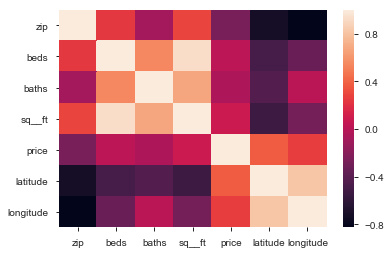

In [75]:
sns.heatmap(multicorr)


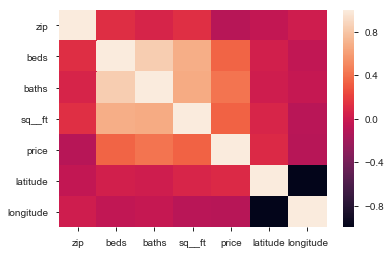

In [77]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
#What variables do you expect to be related to your target?
#beds, baths, zip code b

In [84]:
import numpy as np

In [ ]:
#linear regression !

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.model_selection import cross_val_predict, cross_val_score

In [ ]:
#Develop a two variable linear regression model using scikitlearn, determine RMSE.
#$Develop a multi-variable linear regression model. 
    #Incorporate a train/test split, cross validation, 
    #and polynomial features. Discuss the RMSE.
    

In [108]:
X_beds = df.beds.values.reshape(-1,1)
lr.fit(X_beds, df.price)
print(lr.coef_)
print(lr.intercept_)
predictions_beds = lr.predict(X_beds)
residuals = df.beds - predictions
residuals.describe()


[36661.76549003]
126968.80058333017


count       985.000000
mean    -233713.039594
std       47949.796836
min     -420254.924504
25%     -273611.862543
50%     -236951.097053
75%     -200290.331563
max     -126968.800583
Name: beds, dtype: float64

In [110]:
np.sqrt(mean_squared_error(predictions_beds, df.price))

130495.53675409305

(array([  1.,   0.,   3.,  59.,   0., 258., 413., 133.,  10., 108.]),
 array([-420254.92450361, -390926.31211158, -361597.69971955,
        -332269.08732752, -302940.4749355 , -273611.86254347,
        -244283.25015144, -214954.63775941, -185626.02536739,
        -156297.41297536, -126968.80058333]),
 <a list of 10 Patch objects>)

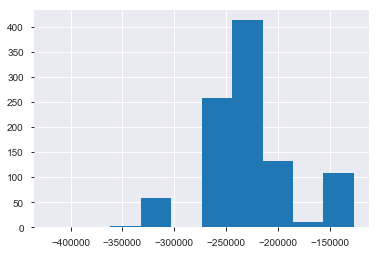

In [111]:
plt.hist(residuals)

In [106]:
X_baths = df.baths.values.reshape(-1,1)
lr.fit(X_baths, df.price)
print (lr.coef_)
print (lr.intercept_)
predictions_baths = lr.predict(X_baths)
residuals = df.baths - predictions
residuals.describe()

[64733.89155502]
118706.4992677246


count       985.000000
mean    -233714.174619
std       47950.352972
min     -420258.924504
25%     -273612.862543
50%     -236952.097053
75%     -200291.331563
max     -126968.800583
Name: baths, dtype: float64

(array([  1.,   0.,   3.,  59.,   3., 255., 413., 133.,  10., 108.]),
 array([-420258.92450361, -390929.91211158, -361600.89971955,
        -332271.88732752, -302942.8749355 , -273613.86254347,
        -244284.85015144, -214955.83775941, -185626.82536739,
        -156297.81297536, -126968.80058333]),
 <a list of 10 Patch objects>)

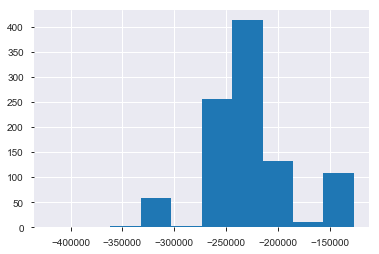

In [107]:
plt.hist(residuals)

[55.17721241]
161272.7527792226


(array([  1.,   0.,   3.,  59., 133., 125., 413., 133.,  10., 108.]),
 array([-416650.92450361, -387682.71211158, -358714.49971955,
        -329746.28732752, -300778.0749355 , -271809.86254347,
        -242841.65015144, -213873.43775941, -184905.22536739,
        -155937.01297536, -126968.80058333]),
 <a list of 10 Patch objects>)

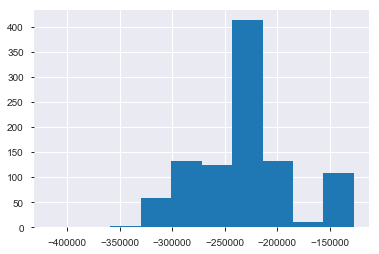

In [104]:
X_sqft = df.sq__ft.values.reshape(-1,1)
lr.fit(X_sqft, df.price)
print(lr.coef_)
print (lr.intercept_)
predictions_sqft = lr.predict(X_sqft)
residuals = df.sq__ft - predictions
residuals.describe()
plt.hist(residuals)

In [113]:
for col in ['beds', 'baths', 'sq__ft']:
    lr.fit(df[col].reshape(-1,1), df.price)
    pred = lr.predict(df[col].reshape(-1,1))
    rmse = np.sqrt(mean_squared_error(pred, df.price))
    print ("the coefficient for ", col, "is ", lr.coef_, "\nThe intercept is", lr.intercept_, "\nand the RMSE is {:.3f}".format(rmse), "\n==========")
    

the coefficient for  beds is  [36661.76549003] 
The intercept is 126968.80058333017 
and the RMSE is 130495.537 
the coefficient for  baths is  [64733.89155502] 
The intercept is 118706.4992677246 
and the RMSE is 126372.492 
the coefficient for  sq__ft is  [55.17721241] 
The intercept is 161272.7527792226 
and the RMSE is 130754.921 


/Users/mmann/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/mmann/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
X = df[['beds', 'baths', 'sq__ft']]
y = df.price
lr.fit(X,y)
predictions = lr.predict(X)


In [115]:
print('The root mean squared error is {:.2f}'.format(np.sqrt(mean_squared_error(y, predictions))))

The root mean squared error is 125730.29


AttributeError: 'DataFrame' object has no attribute 'best'

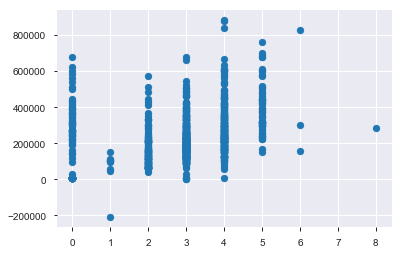